In [ ]:
sample = pd.read_csv('diabetes.csv')
orig_train = pd.read_csv('diabetes.csv')

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving diabetes.csv to diabetes (2).csv


In [ ]:

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_21, *[[['index', 'Pregnancies'], ['Pregnancies', 'Glucose'], ['Glucose', 'BloodPressure'], ['BloodPressure', 'SkinThickness']]], **{})
chart

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

from sklearn import set_config
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, RepeatedKFold, train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_error, roc_auc_score, roc_curve
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

pd.set_option('display.max_rows', 100)
set_config(transform_output = 'pandas')

SyntaxError: ignored

In [ ]:
desc = pd.DataFrame(index = list(orig_train))
desc['count'] = orig_train.count()
desc['nunique'] = orig_train.nunique()
desc['%unique'] = desc['nunique'] / len(orig_train) * 100
desc['null'] = orig_train.isnull().sum()
desc['type'] = orig_train.dtypes
desc = pd.concat([desc, orig_train.describe().T], axis = 1)
desc

,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
Pregnancies,768,17,2.213542,0,int64,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768,136,17.708333,0,int64,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768,47,6.119792,0,int64,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768,51,6.640625,0,int64,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768,186,24.218750,0,int64,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768,248,32.291667,0,float64,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768,517,67.317708,0,float64,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768,52,6.770833,0,int64,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768,2,0.260417,0,int64,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
sample.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
desc = pd.DataFrame(index = list(sample))
desc['count'] = sample.count()
desc['nunique'] = sample.nunique()
desc['%unique'] = desc['nunique'] / len(sample) * 100
desc['null'] = sample.isnull().sum()
desc['type'] = sample.dtypes
desc = pd.concat([desc, sample.describe().T], axis = 1)
desc

,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
Pregnancies,768,17,2.213542,0,int64,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768,136,17.708333,0,int64,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768,47,6.119792,0,int64,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768,51,6.640625,0,int64,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768,186,24.218750,0,int64,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768,248,32.291667,0,float64,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768,517,67.317708,0,float64,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768,52,6.770833,0,int64,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768,2,0.260417,0,int64,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


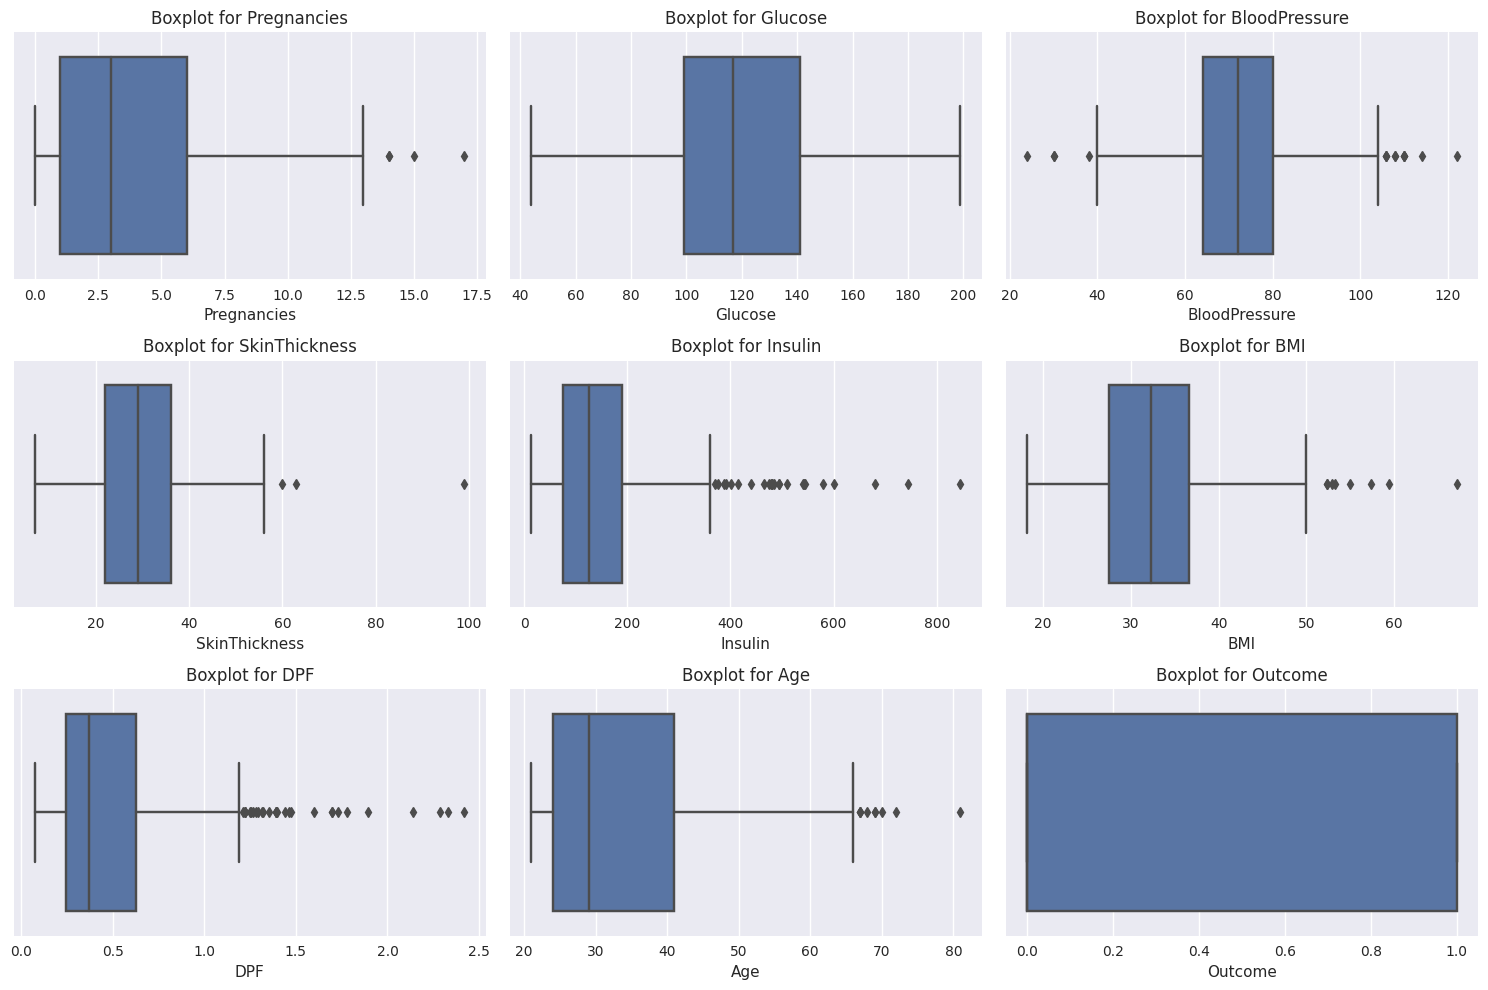

In [ ]:
num_rows, num_cols = 3, 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Remove any remaining empty subplots
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

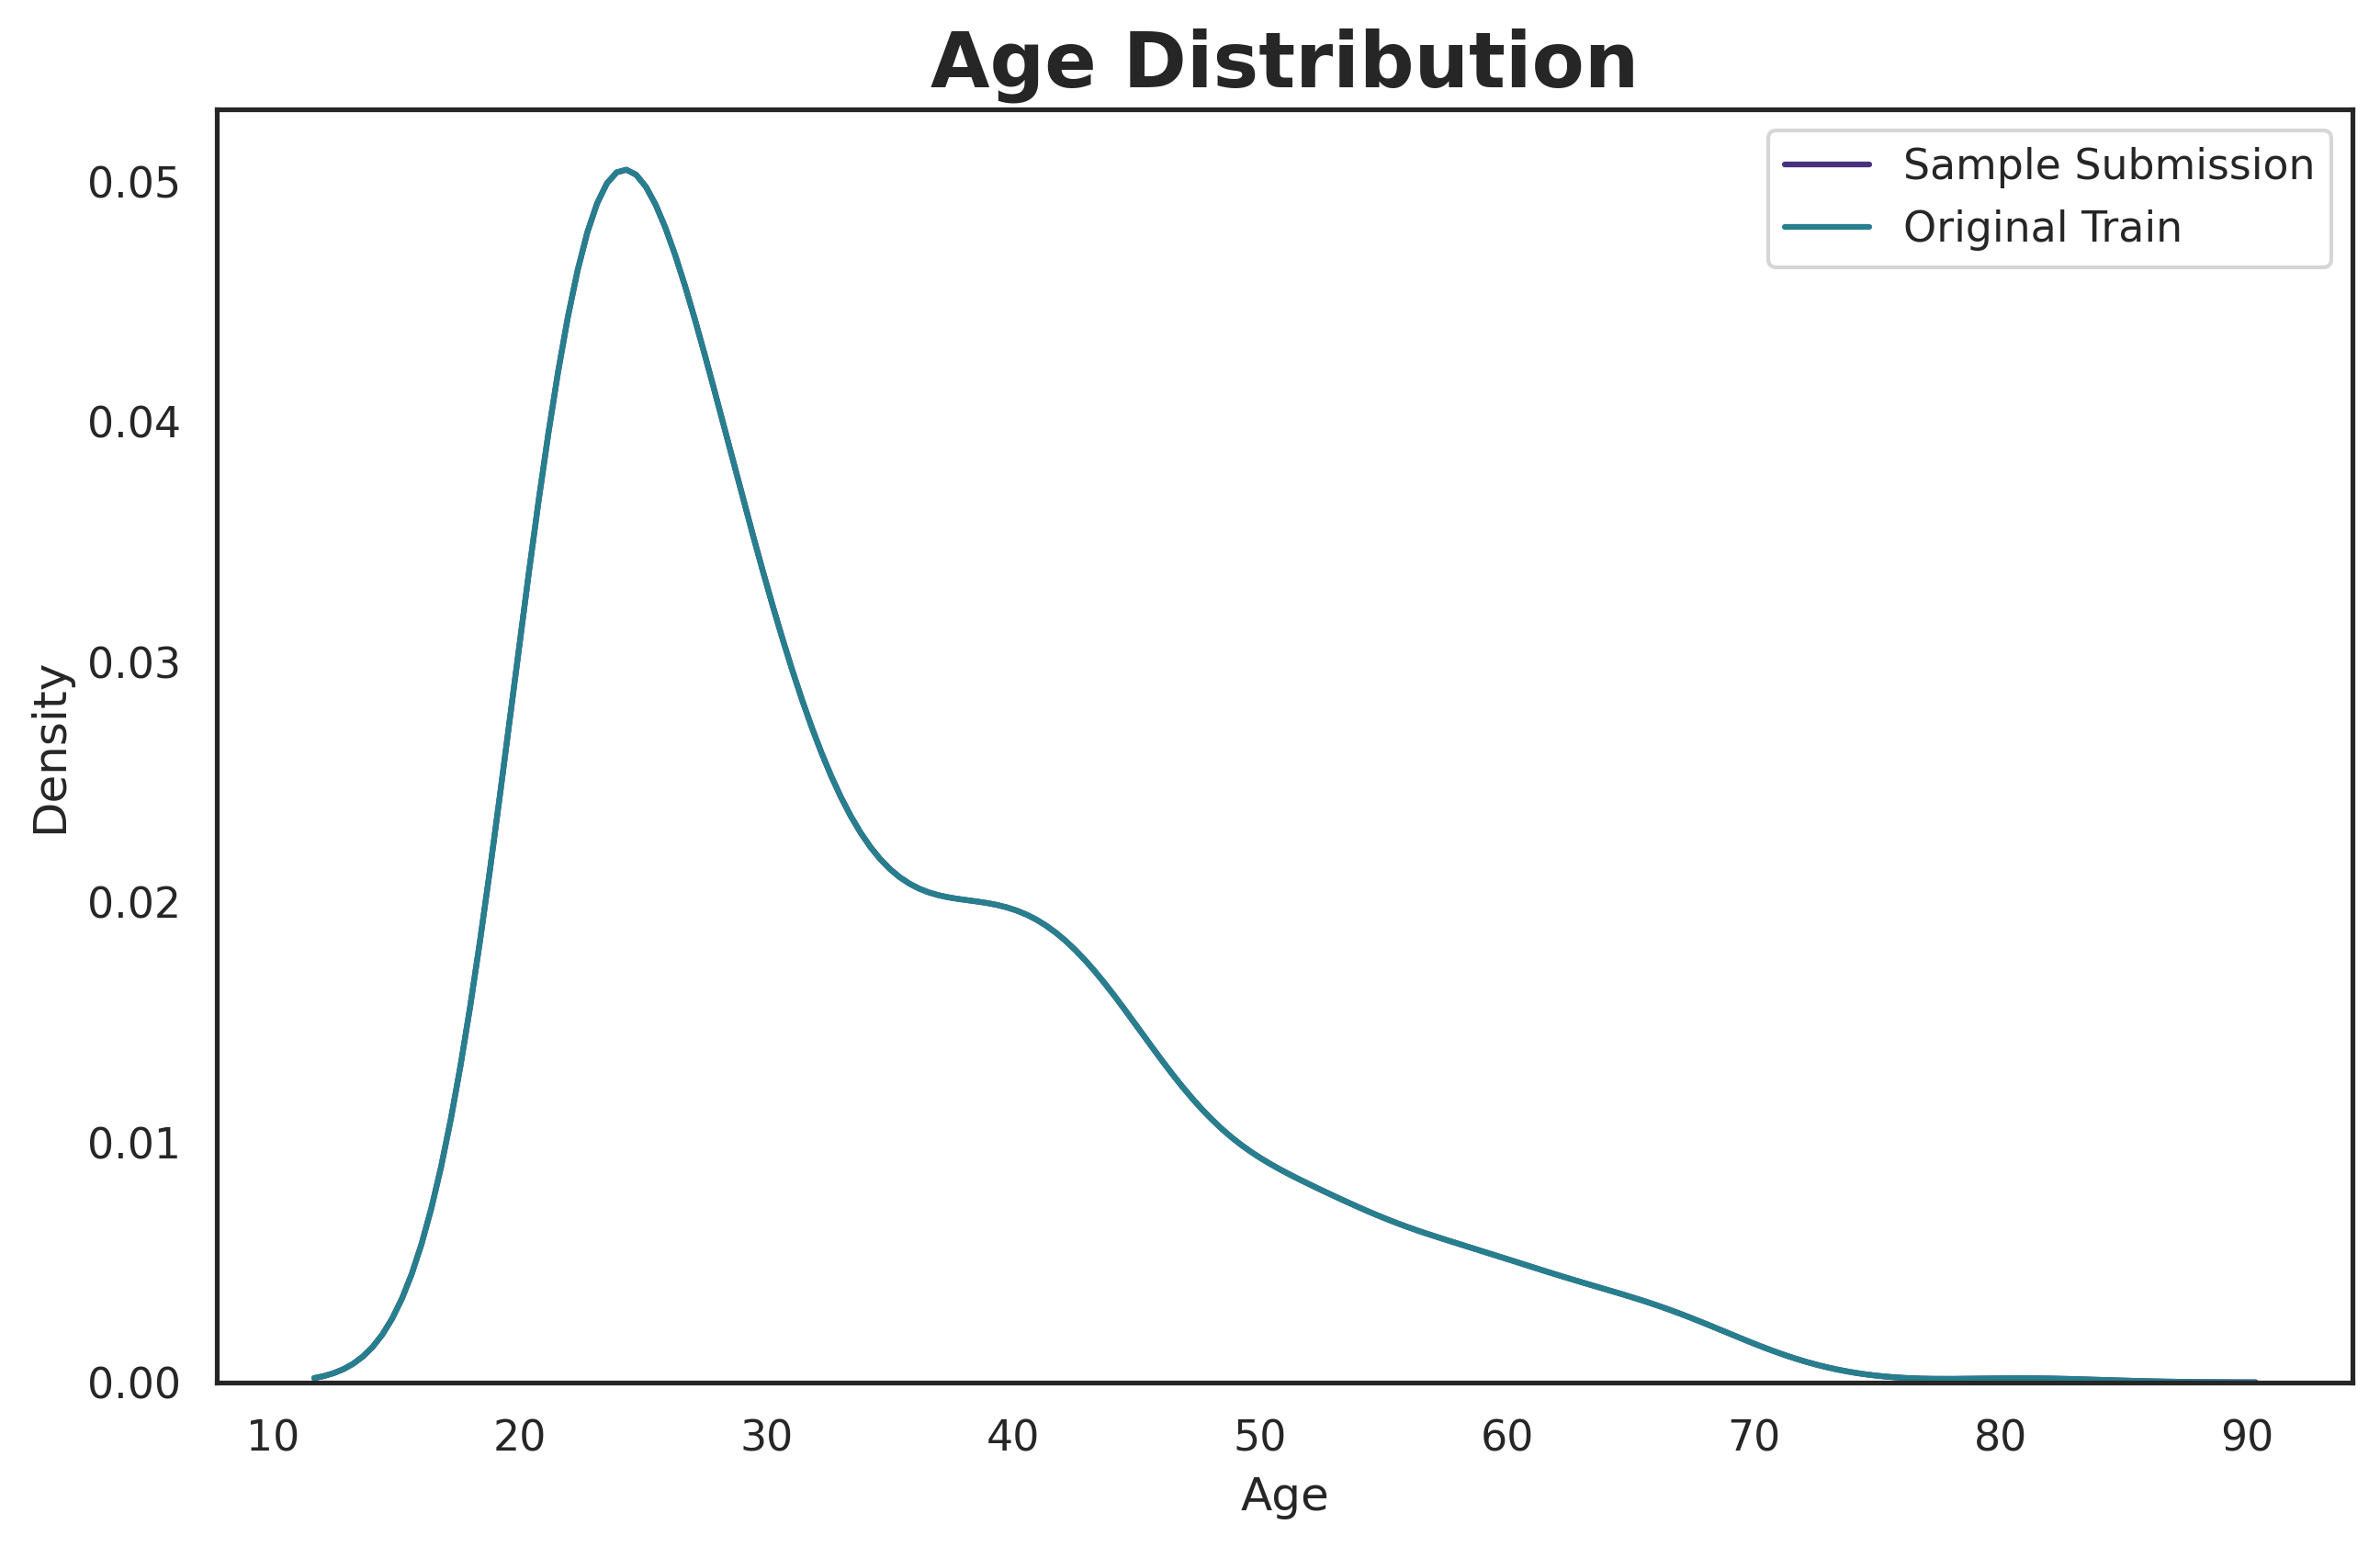

In [ ]:
plt.figure(figsize = (10, 6), dpi = 300)
sns.kdeplot(data = sample, x = 'Age', color = pal[0])
sns.kdeplot(data = orig_train, x = 'Age', color = pal[2])
plt.title('Age Distribution', weight = 'bold', size = 20)
plt.legend(['Sample Submission', 'Original Train'])
plt.show()

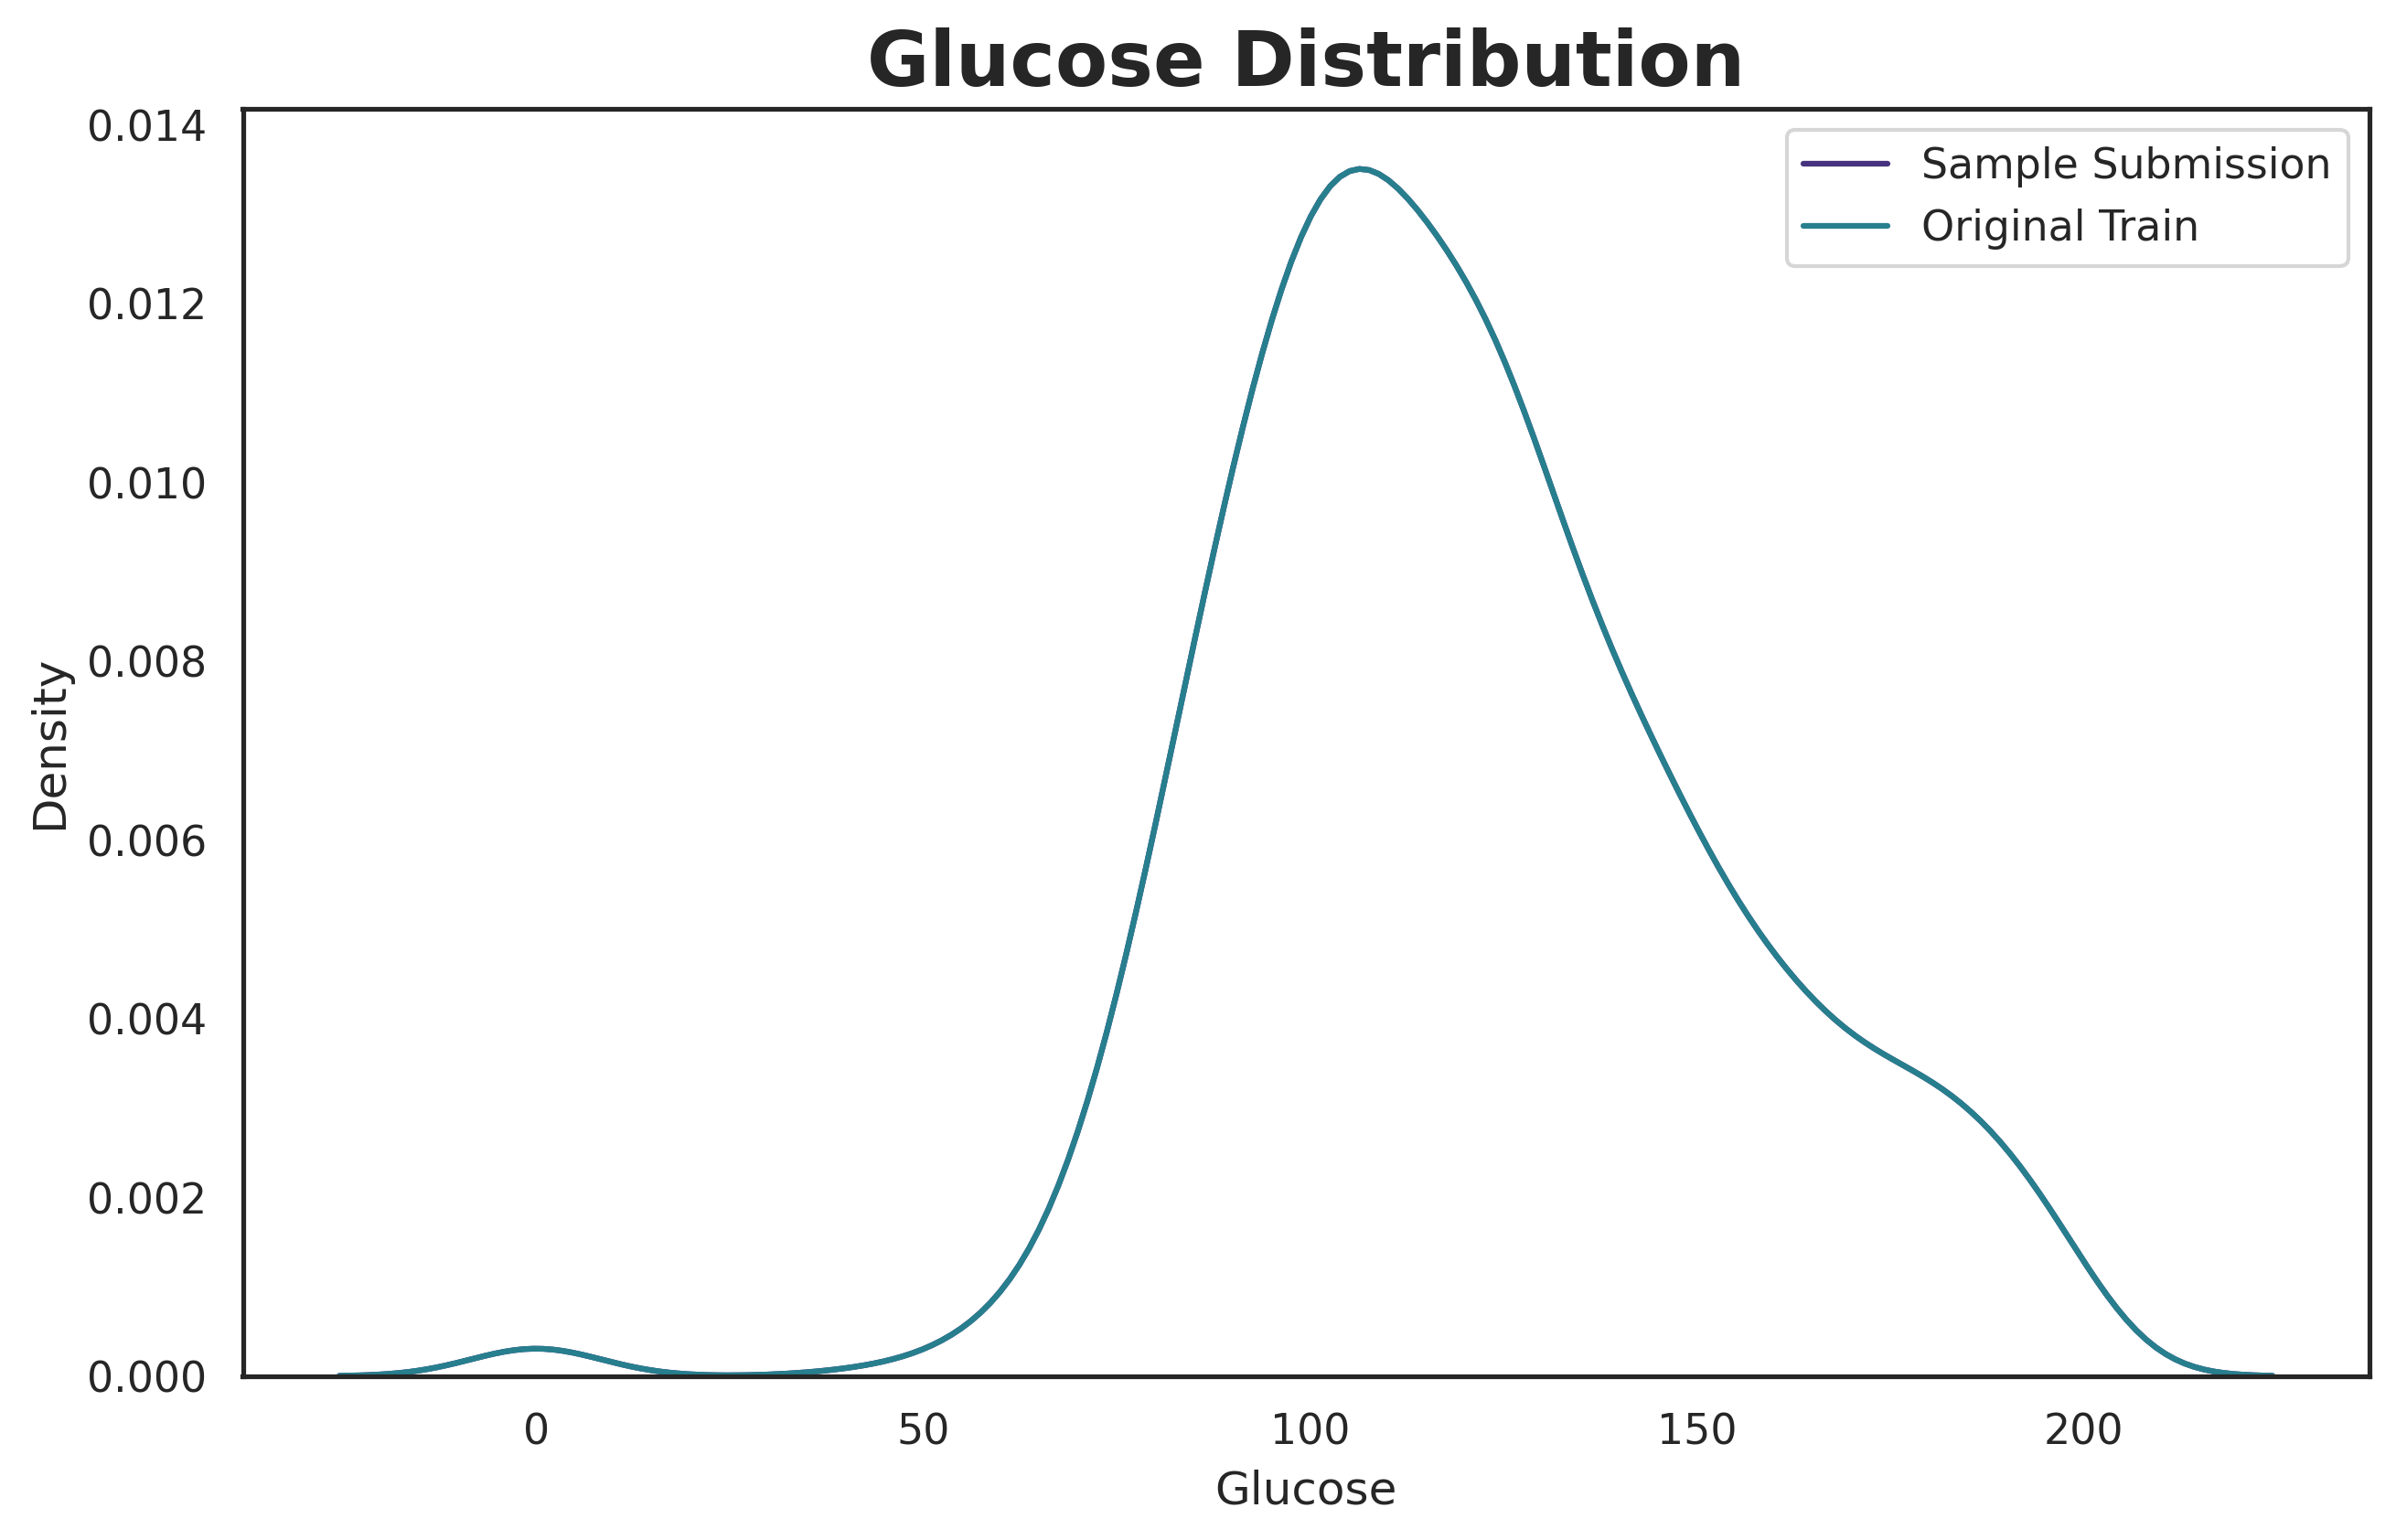

In [ ]:
plt.figure(figsize = (10, 6), dpi = 300)
sns.kdeplot(data = sample, x = 'Glucose', color = pal[0])
sns.kdeplot(data = orig_train, x = 'Glucose', color = pal[2])
plt.title('Glucose Distribution', weight = 'bold', size = 20)
plt.legend(['Sample Submission', 'Original Train'])
plt.show()

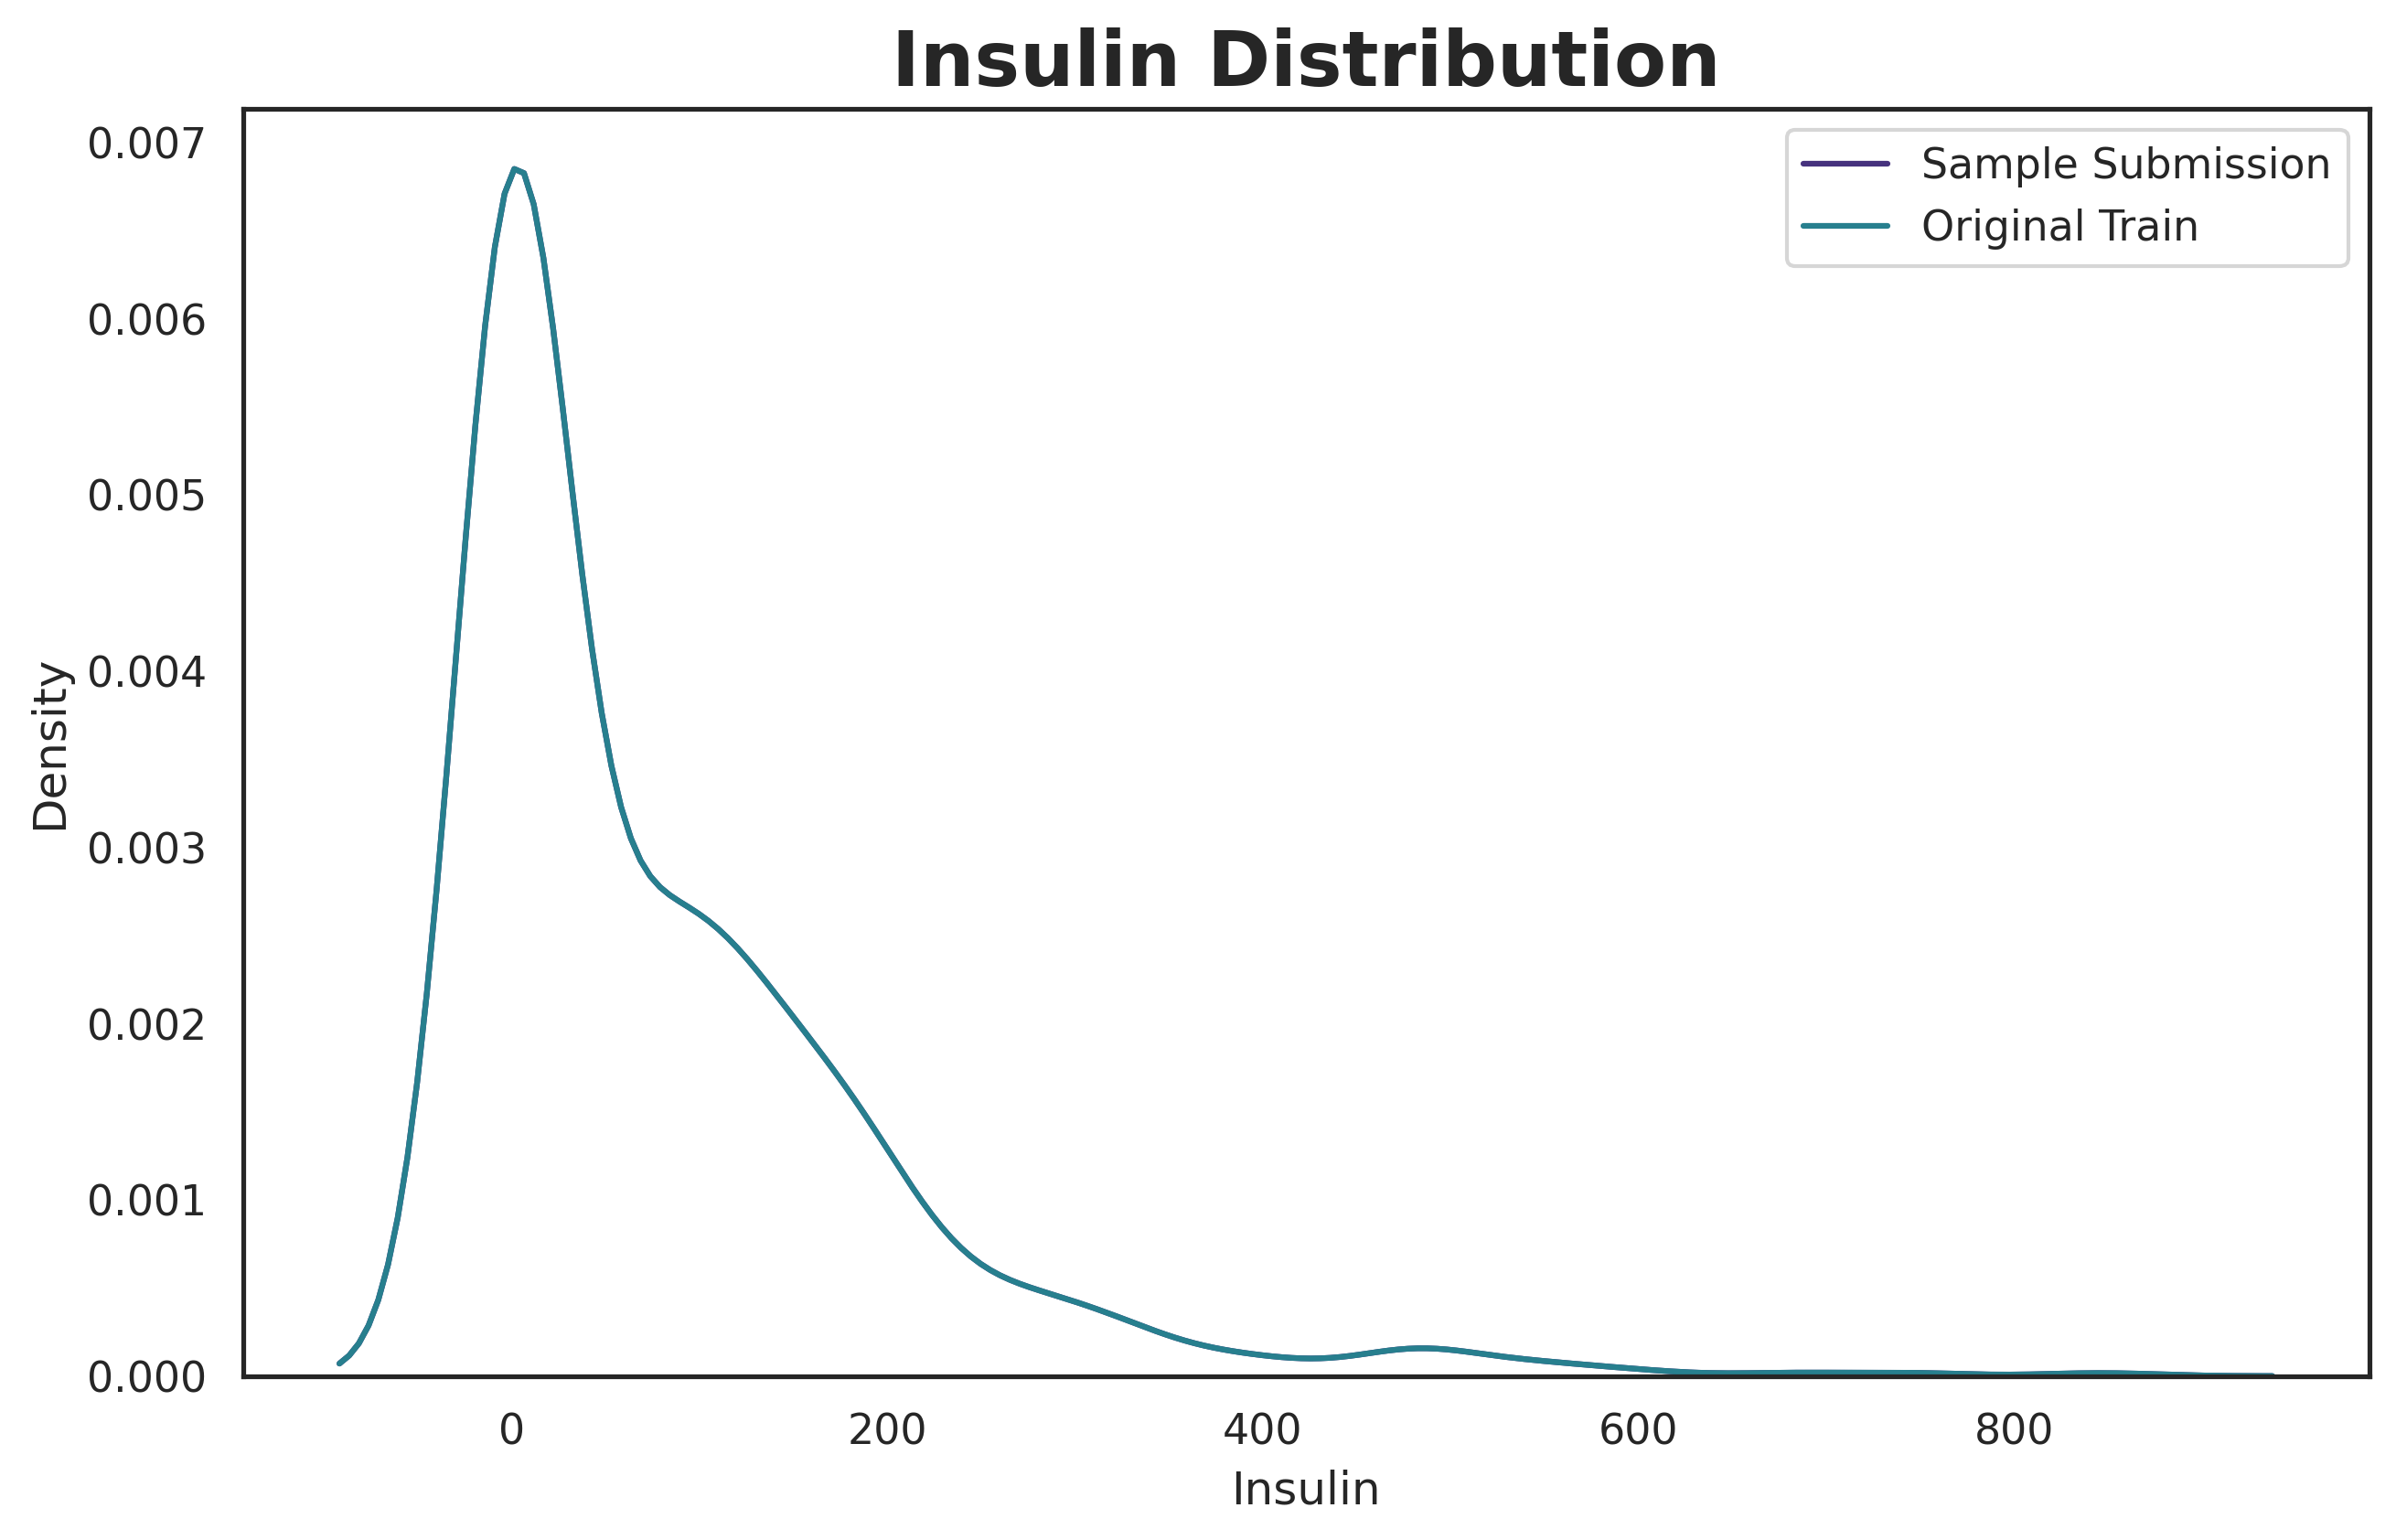

In [ ]:
plt.figure(figsize = (10, 6), dpi = 300)
sns.kdeplot(data = sample, x = 'Insulin', color = pal[0])
sns.kdeplot(data = orig_train, x = 'Insulin', color = pal[2])
plt.title('Insulin Distribution', weight = 'bold', size = 20)
plt.legend(['Sample Submission', 'Original Train'])
plt.show()

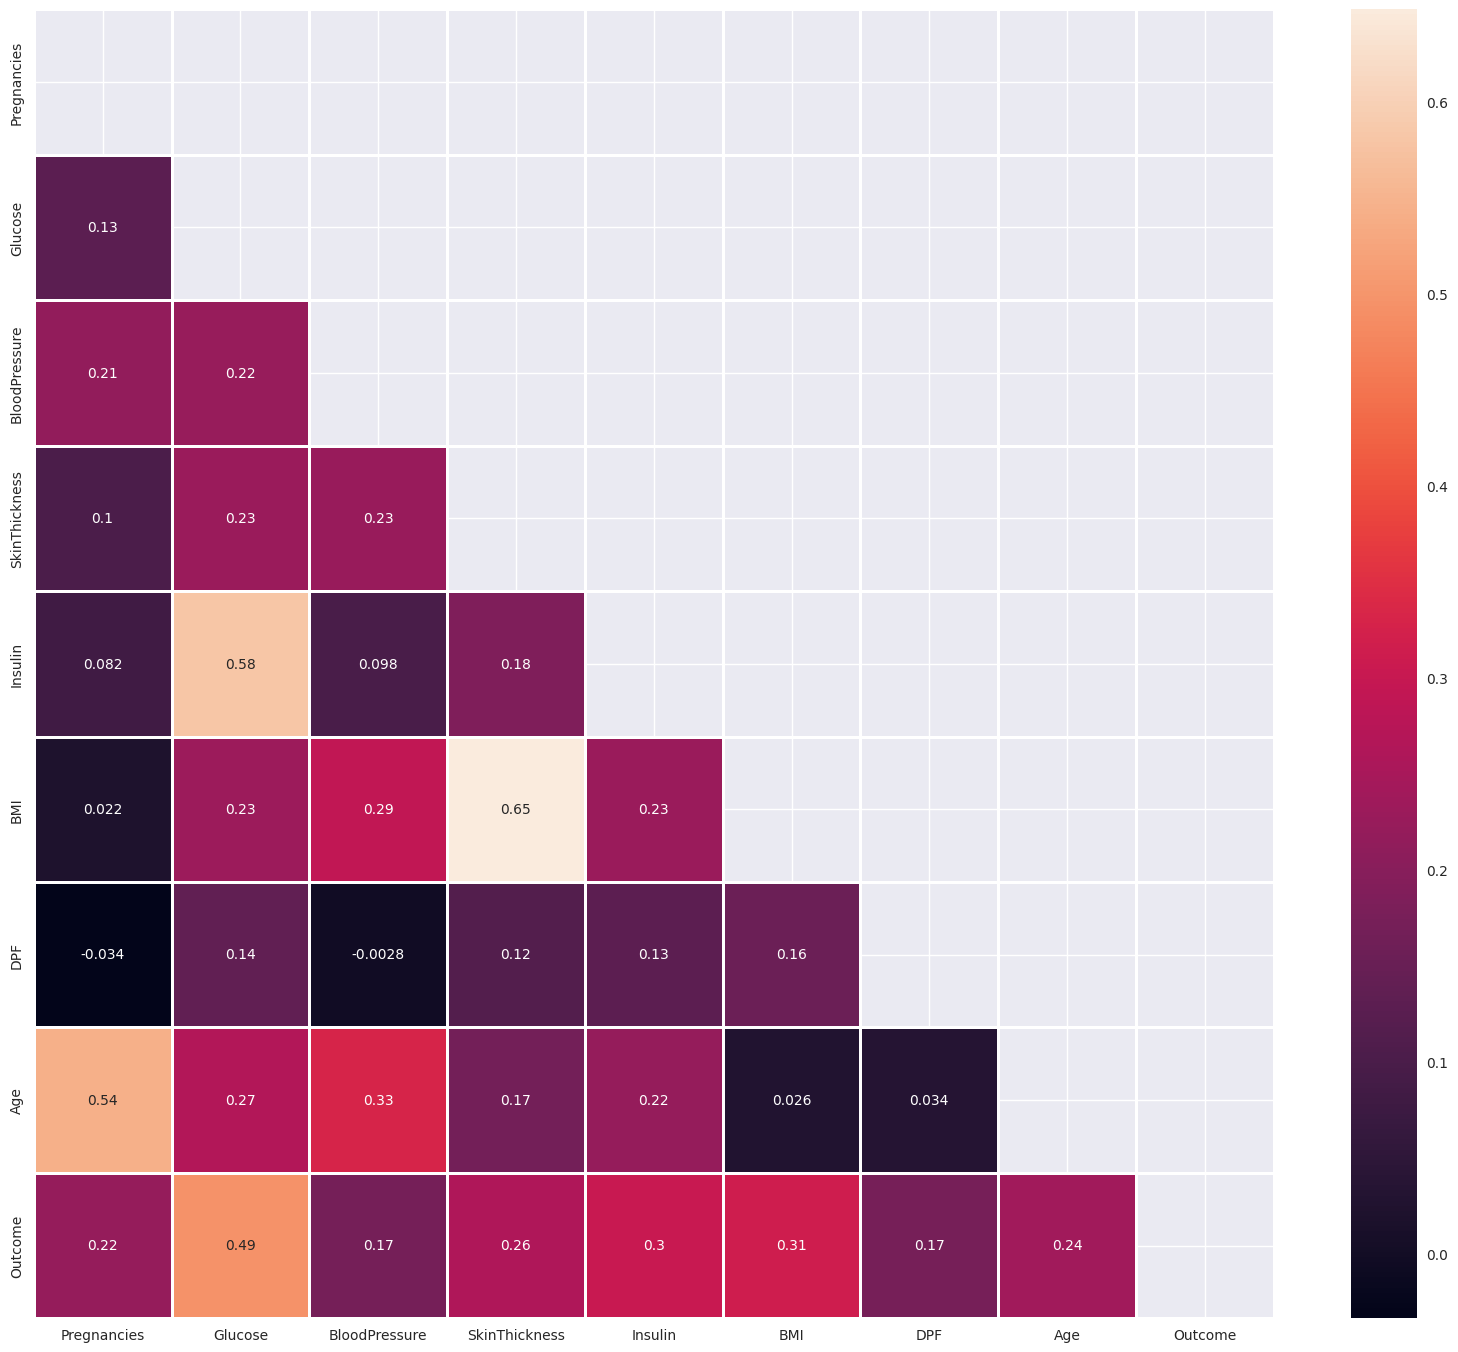

In [ ]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

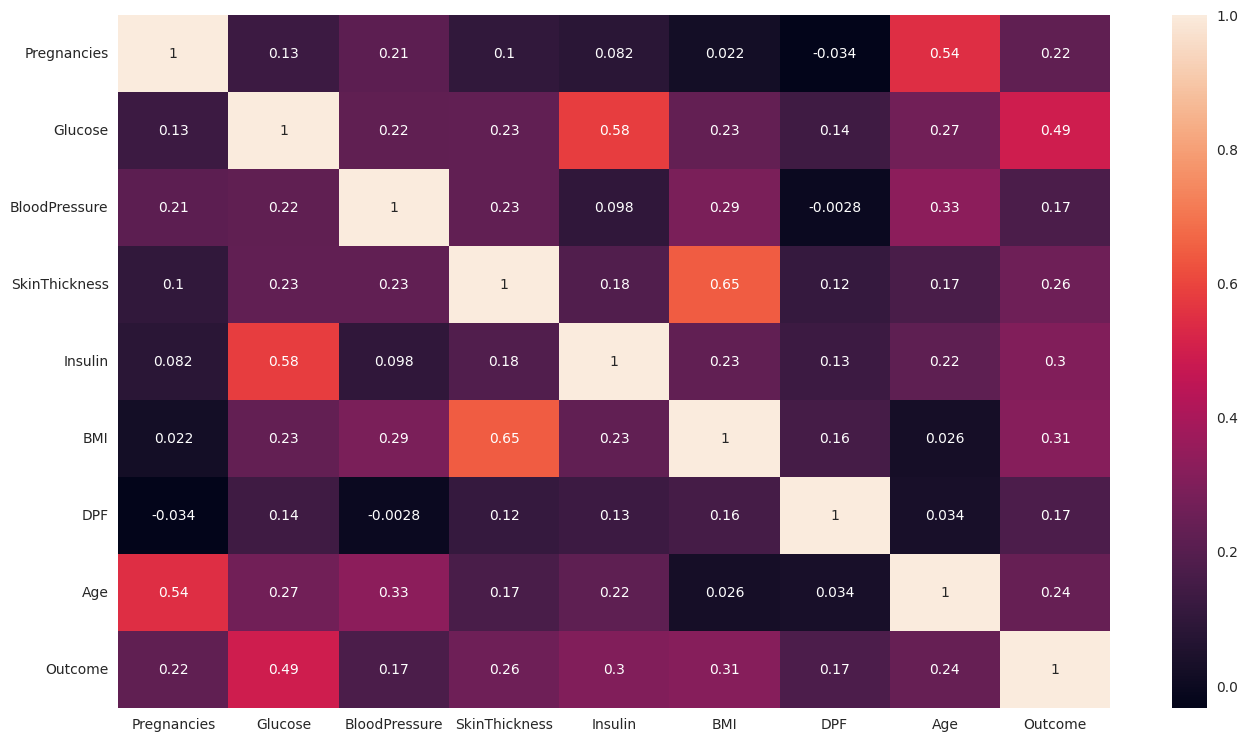

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True);

In [ ]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Outcome"]) >= 0.2]
hig_corr_features

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

In [ ]:
#Standard Deviation
df.var()

Pregnancies        11.354
Glucose           932.425
BloodPressure     153.318
SkinThickness     109.767
Insulin         14107.704
BMI                47.955
DPF                 0.110
Age               138.303
Outcome             0.227
dtype: float64

In [ ]:
def distance(data, label = ''):

    corr = data.corr(method = 'spearman')
    dist_linkage = linkage(squareform(1 - abs(corr)), 'complete')

    plt.figure(figsize = (10, 8), dpi = 300)
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=90)
    plt.title(f'Feature Distance in {label} Dataset', weight = 'bold', size = 20)
    plt.show()

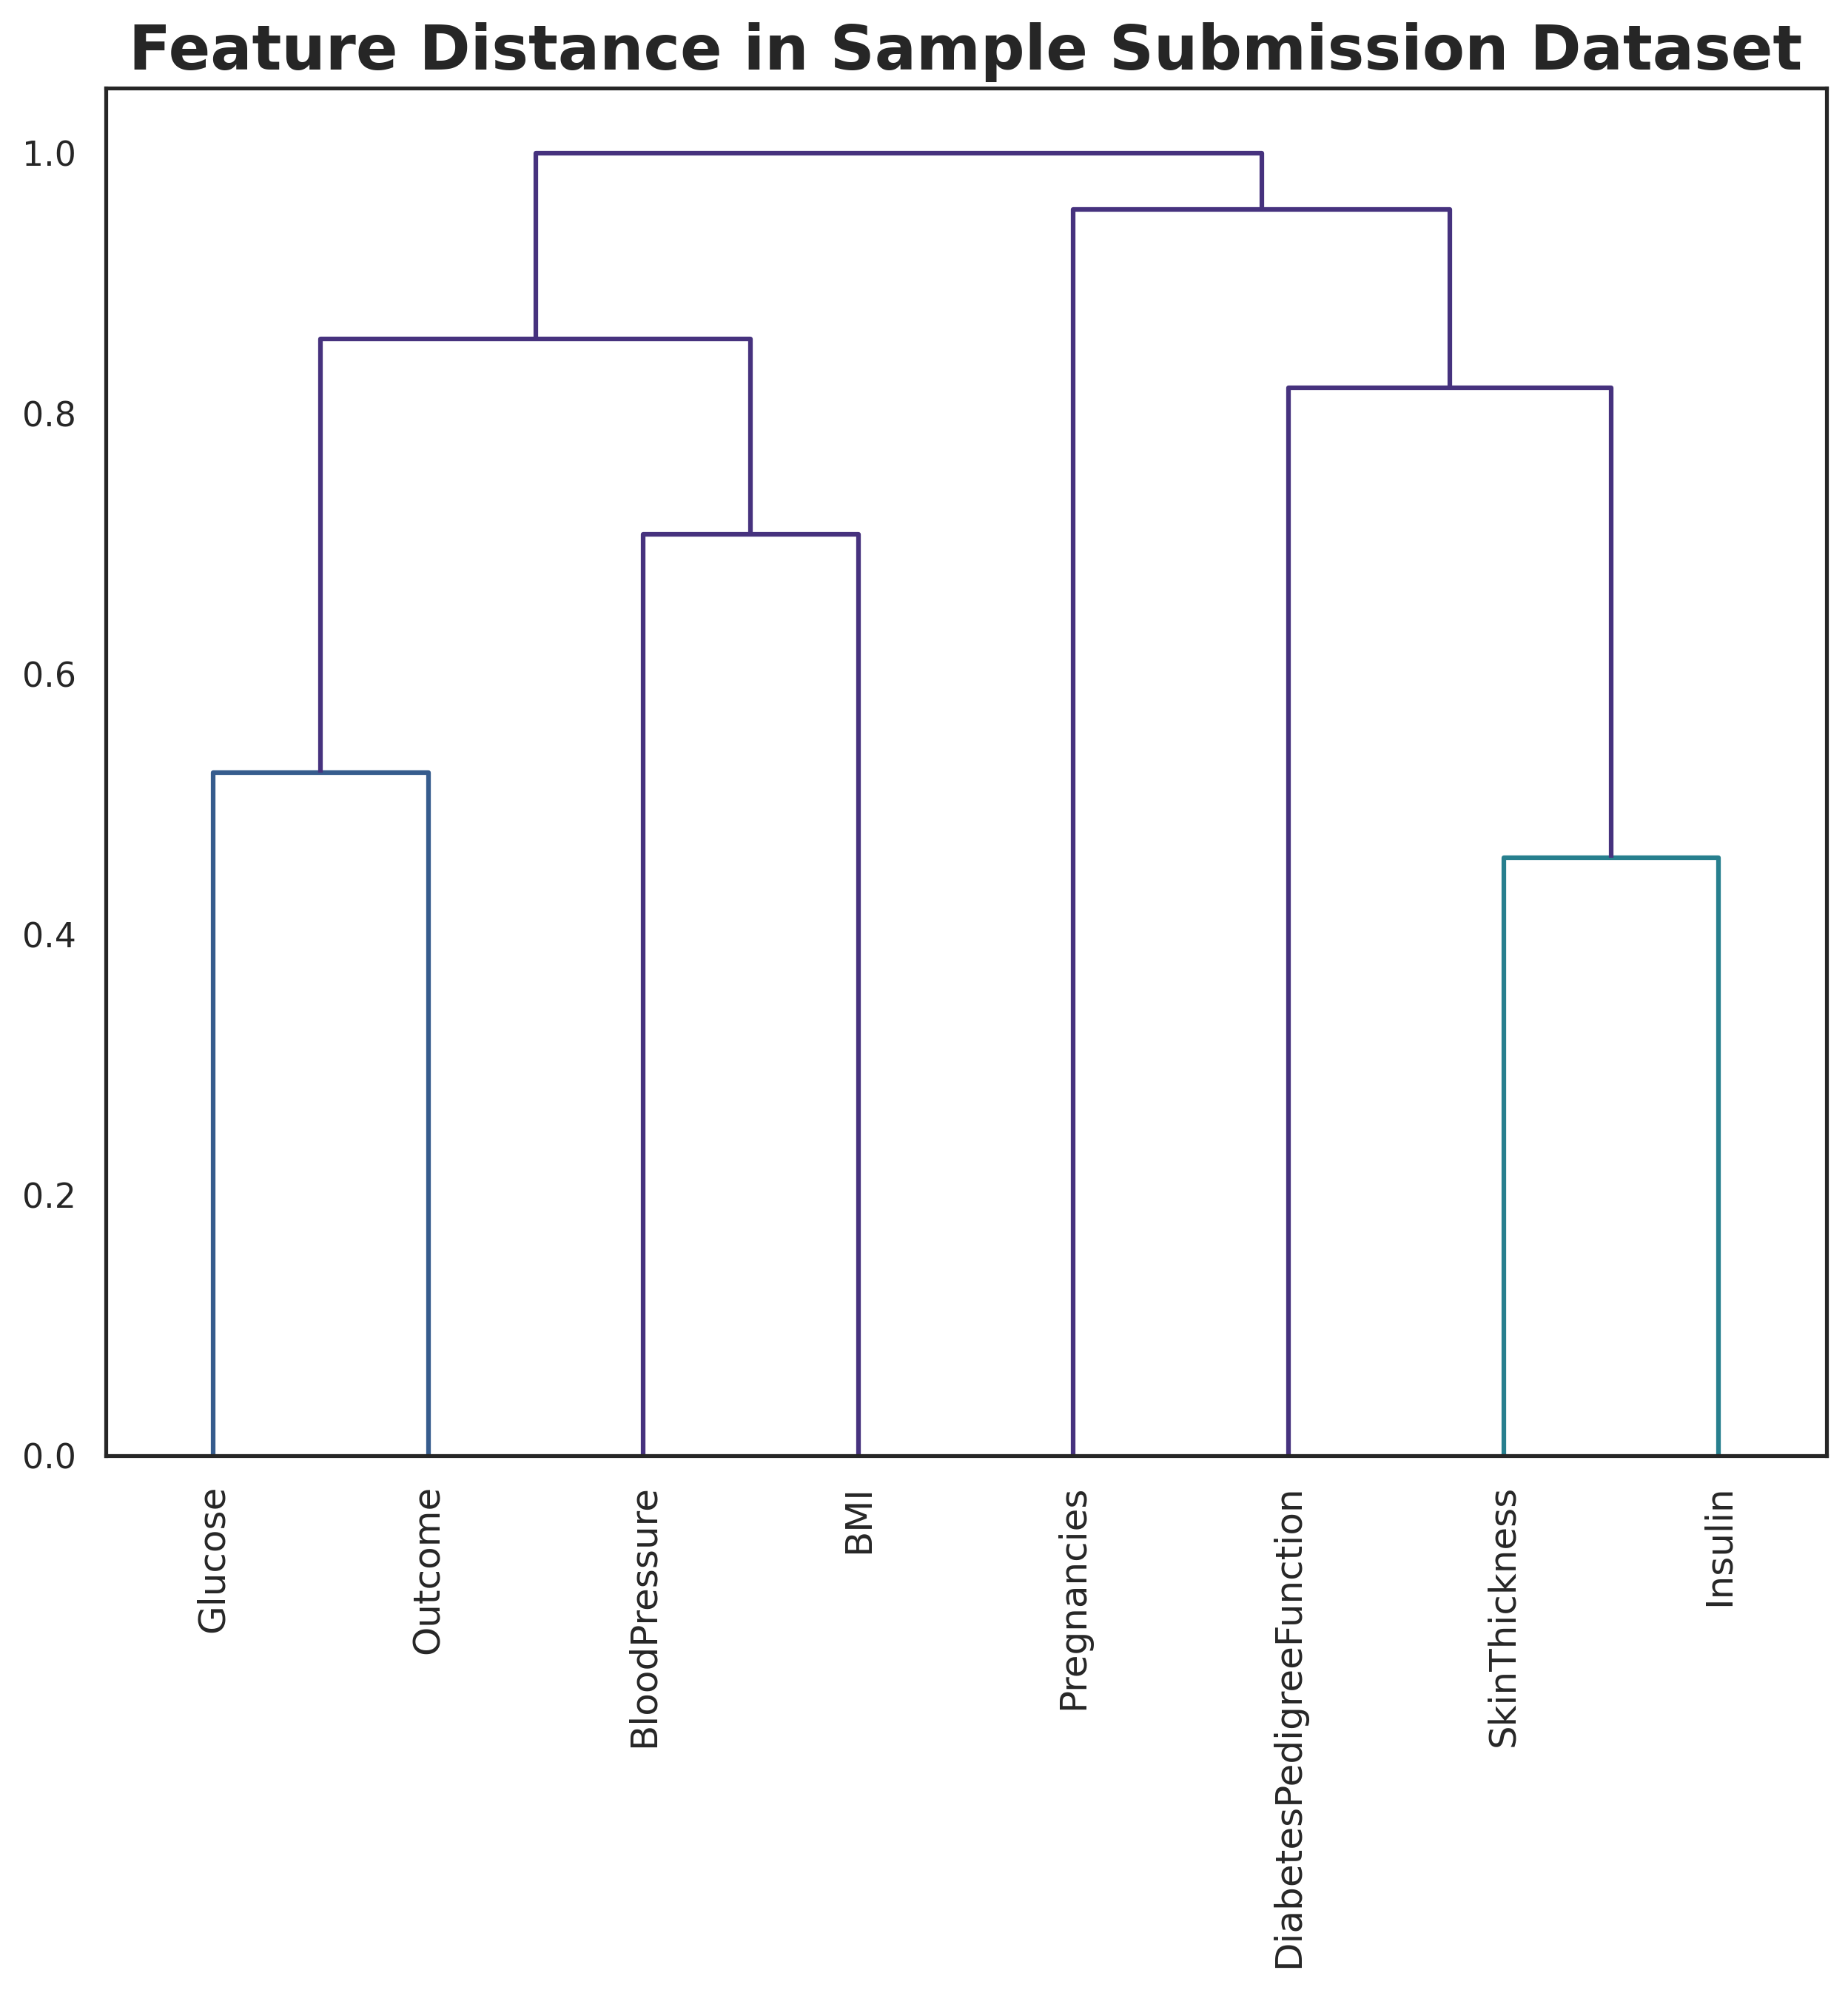

In [ ]:
distance(sample.drop('Age', axis = 1), 'Sample Submission')

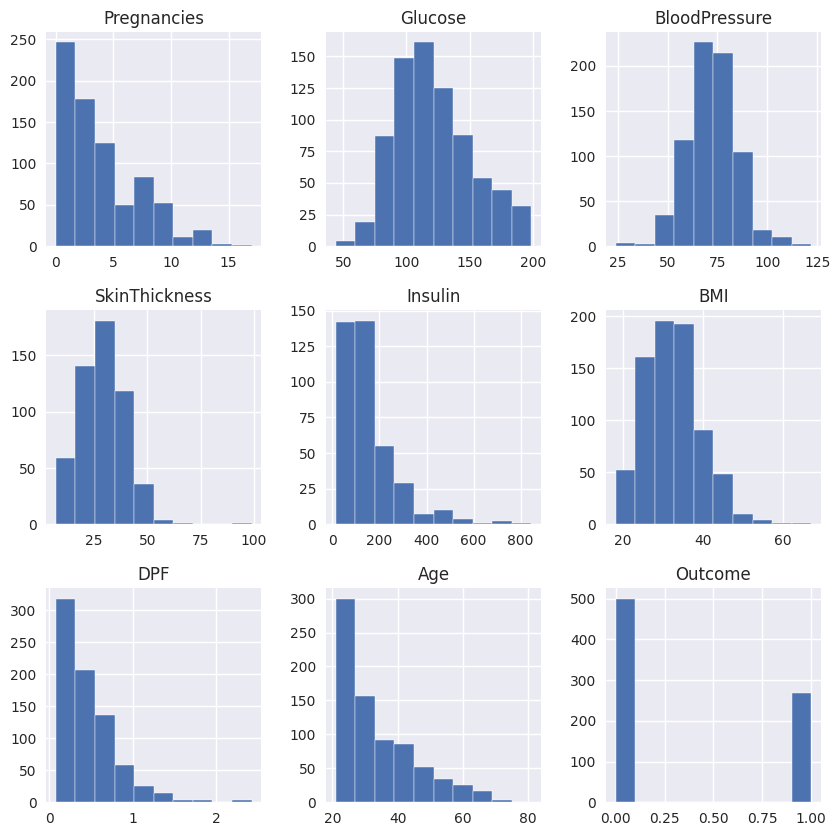

In [ ]:


df.hist(figsize = (10,10))
plt.show()



In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [ ]:
def load():
    data = pd.read_csv("diabetes.csv")
    return data

df = load()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [ ]:
df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)

In [ ]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,0.000,0.000,3.000,6.000,9.000,13.000,17.000
Glucose,768.000,120.895,31.973,0.000,57.000,79.000,117.000,140.250,167.000,196.000,199.000
BloodPressure,768.000,69.105,19.356,0.000,0.000,38.700,72.000,80.000,88.000,106.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,0.000,23.000,32.000,40.000,51.330,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,0.000,30.500,127.250,210.000,519.900,846.000
BMI,768.000,31.993,7.884,0.000,0.000,21.800,32.000,36.600,41.500,50.759,67.100
DPF,768.000,0.472,0.331,0.078,0.095,0.140,0.372,0.626,0.879,1.698,2.420
Age,768.000,33.241,11.760,21.000,21.000,21.000,29.000,41.000,51.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [ ]:
# Defining missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [ ]:


# Plotting
missing_plot(df, 'Outcome')



In [ ]:
def missing_percent(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_table = pd.concat([mis_val, mis_percent], axis=1)

        # Rename the columns
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})

        # Sort the table by percentage of missing descending
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_columns

In [ ]:
miss_cols_info = missing_percent(df)
miss_cols_info

Your selected dataframe has 9 columns.
There are 5 columns that have missing values.


,Missing Values,Percent of Total Values
Insulin,374,48.700
SkinThickness,227,29.560
BloodPressure,35,4.560
BMI,11,1.430
Glucose,5,0.650




Columns with a missing values of more than 70% are dropped and the analysis continues. However, this rate in our data set does not exceed 50%.

We may want to apply different operations according to the proportions of missing values in the data set. In our example, we want to drop the independent variables that have more than 25% missing values.


In [ ]:
df_drop = df.copy()
df_drop.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [ ]:
#Columns with more than 25% missing data
drop_cols = miss_cols_info[miss_cols_info['Percent of Total Values'] > 25]
drop_cols

,Missing Values,Percent of Total Values
Insulin,374,48.700
SkinThickness,227,29.560


In [ ]:
col_names = drop_cols.index.tolist()
col_names

['Insulin', 'SkinThickness']

In [ ]:
# Deleted 2 columns containing nan: ['Insulin', 'SkinThickness']
df_drop.drop(col_names, axis = 1, inplace=True)
df_drop.head()

,Pregnancies,Glucose,BloodPressure,BMI,DPF,Age,Outcome
0,6,148.000,72.000,33.600,0.627,50,1
1,1,85.000,66.000,26.600,0.351,31,0
2,8,183.000,64.000,23.300,0.672,32,1
3,1,89.000,66.000,28.100,0.167,21,0
4,0,137.000,40.000,43.100,2.288,33,1


In [ ]:

# Dropping rows with nan values

# Now deleted rows 2 columns containing nan for ['Insulin', 'SkinThickness']
df_drop_rows = df.copy()
df_drop_rows.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [ ]:
df_drop_rows=df_drop_rows.dropna(subset=col_names)
df_drop_rows.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1
6,3,78.000,50.000,32.000,88.000,31.000,0.248,26,1
8,2,197.000,70.000,45.000,543.000,30.500,0.158,53,1
13,1,189.000,60.000,23.000,846.000,30.100,0.398,59,1


<ipython-input-23-80829bd98835>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



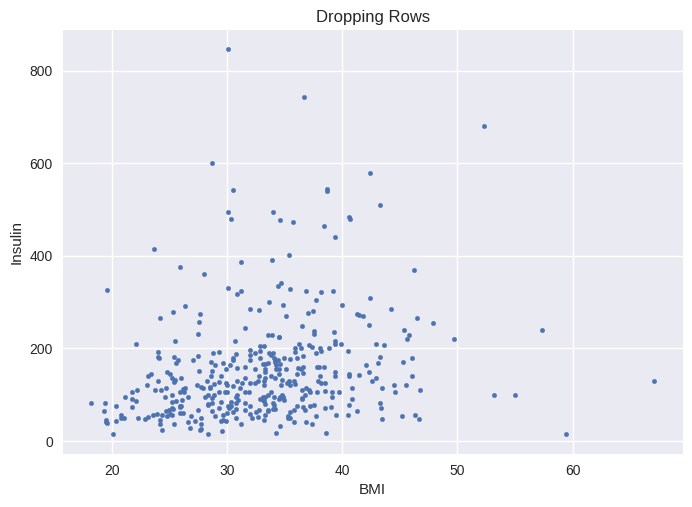

In [ ]:
# Analyze visually with scatter plot
plt.style.use('seaborn')
fig = plt.Figure()
fig = df_drop_rows.plot(x="BMI", y='Insulin', kind='scatter',
                    s = 10,
                    title='Dropping Rows', colorbar=False)

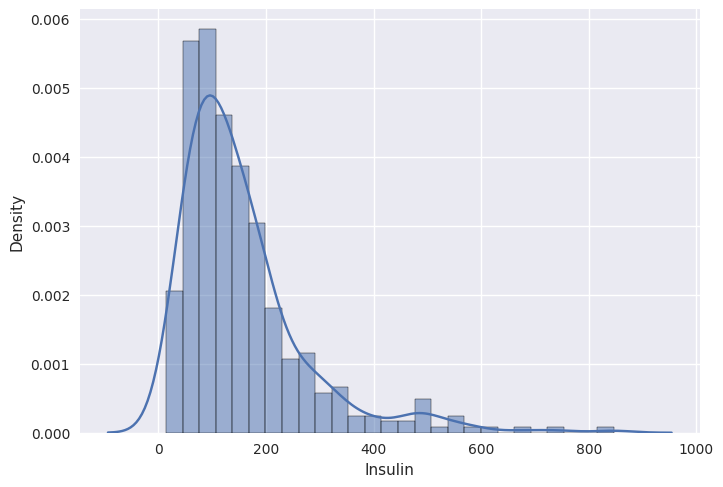

In [ ]:
sns.histplot(
    df_drop_rows["Insulin"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
sns.set_style("darkgrid")

K-Nearest Neighbour (KNN) Imputation

The default value of K is set to 5. Although there is no definitive method for determining the ideal value of K, a commonly used heuristic suggests that the optimal K is often the square root of the total number of samples in the dataset. Typically, an odd value is chosen for K to prevent ties in decision-making. To identify the most suitable K, an error plot or accuracy plot is commonly used.

In [ ]:
df_knn = df.copy()

In [ ]:

df_knn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


In [ ]:
df_knn = df_knn.filter(['Pregnancies','Glucose','BloodPressure','BMI','DPF','Age','Insulin'], axis=1).copy()
df_knn.head()

,Pregnancies,Glucose,BloodPressure,BMI,DPF,Age,Insulin
0,6,148.000,72.000,33.600,0.627,50,NaN
1,1,85.000,66.000,26.600,0.351,31,NaN
2,8,183.000,64.000,23.300,0.672,32,NaN
3,1,89.000,66.000,28.100,0.167,21,94.000
4,0,137.000,40.000,43.100,2.288,33,168.000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['BMI'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Pregnancies'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Glucose'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['BloodPressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['BMI'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Pregnancies', 'Glucose'], ['Glucose', 'BloodPressure'], ['BloodPressure', 'BMI'], ['BMI', 'DPF']]], **{})
chart

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

NameError: ignored

In [ ]:
df_knn_imputed.head()

,Pregnancies,Glucose,BloodPressure,BMI,DPF,Age,Insulin
0,0.353,0.671,0.490,0.315,0.234,0.483,0.287
1,0.059,0.265,0.429,0.172,0.117,0.167,0.045
2,0.471,0.897,0.408,0.104,0.254,0.183,0.275
3,0.059,0.290,0.429,0.202,0.038,0.000,0.096
4,0.000,0.600,0.163,0.509,0.944,0.200,0.185


In [ ]:
original_data = scaler.inverse_transform(df_knn_imputed)
# Convert the original data to a DataFrame
df_original = pd.DataFrame(original_data, columns=df_knn.columns)

In [ ]:
df_original.head()

,Pregnancies,Glucose,BloodPressure,BMI,DPF,Age,Insulin
0,6.000,148.000,72.000,33.600,0.627,50.000,253.200
1,1.000,85.000,66.000,26.600,0.351,31.000,51.600
2,8.000,183.000,64.000,23.300,0.672,32.000,243.000
3,1.000,89.000,66.000,28.100,0.167,21.000,94.000
4,0.000,137.000,40.000,43.100,2.288,33.000,168.000


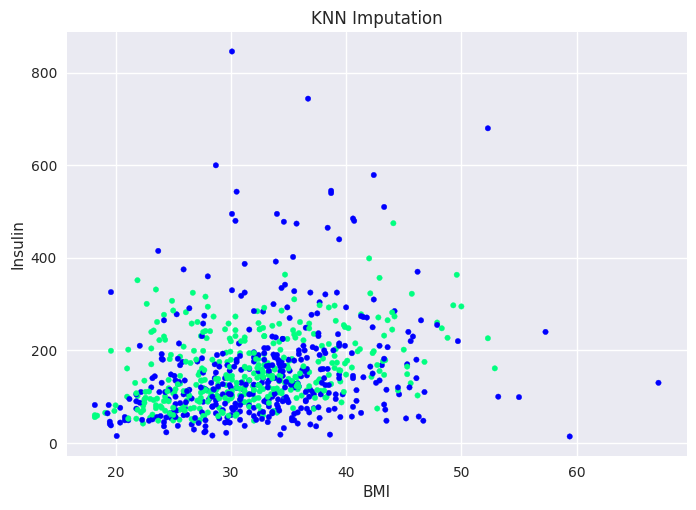

In [ ]:
fig = plt.Figure()
null_values = df['Insulin'].isnull()
fig = df_original.plot(x='BMI', y='Insulin', kind='scatter',
                          c=null_values, cmap='winter', s = 15,
                          title='KNN Imputation', colorbar=False)

Text(0.5, 1.0, 'KNN Imputation')

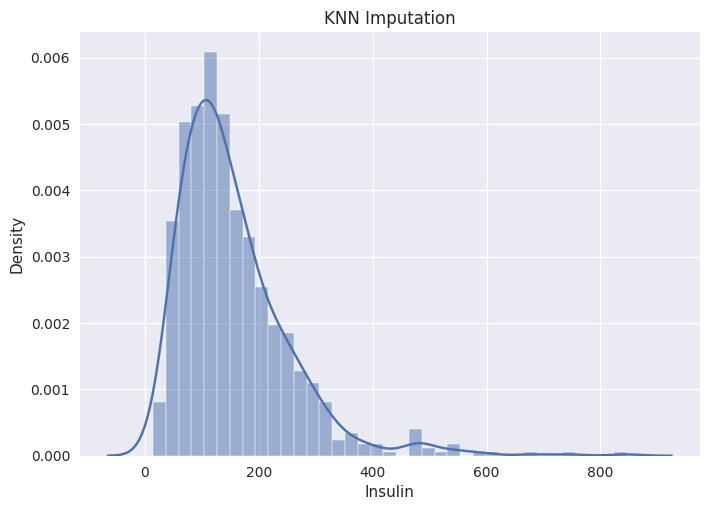

In [ ]:
sns.histplot(
    df_original["Insulin"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
plt.title('KNN Imputation')

K-Nearest Neighbors (KNN) imputation tends to incur higher computational costs compared to simple imputation methods. However, it's important to note that KNN imputation remains effective for datasets that do not exceed the scale of tens of millions of records. However, as we can see from the scatterplots, knn seems to have completed the missing values in a way that does not distort a normal distribution.

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading and preprocess your dataset
data = pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model
decision_tree_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_pred = decision_tree_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Printing the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import itertools
plt.style.use('fivethirtyeight')
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
# Separate the dataset into features (X) and the target variable (y)
feature_columns = [col for col in data.columns if col != 'Outcome']
X = data[feature_columns]  # Features
y = data['Outcome']  # Target variable


In [ ]:
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Feature 1 : BMI Indicator
 adding BMI Indicator feature as we know : If you have a BMI of:

    Under 18.5 – you are considered underweight and possibly malnourished.
    18.5 to 24.9 – you are within a healthy weight range for young and middle-aged adults.
    25.0 to 29.9 – you are considered overweight.
    Over 30 – you are considered obese.



In [ ]:
def set_bmi(row):
    if row["BMI"] < 18.5:
        return "Under"
    elif row["BMI"] >= 18.5 and row["BMI"] <= 24.9:
        return "Healthy"
    elif row["BMI"] >= 25 and row["BMI"] <= 29.9:
        return "Over"
    elif row["BMI"] >= 30:
        return "Obese"

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [ ]:
df = df.assign(BM_DESC=df.apply(set_bmi, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC
0,6,148,72,35,0,33.6,0.627,50,1,Obese
1,1,85,66,29,0,26.6,0.351,31,0,Over
2,8,183,64,0,0,23.3,0.672,32,1,Healthy
3,1,89,66,23,94,28.1,0.167,21,0,Over
4,0,137,40,35,168,43.1,2.288,33,1,Obese




Feature 2: Insulin Indicative Range
If insulin level (2-Hour serum insulin (mu U/ml)) is >= 16 and <= 166, then it is normal range else it is considered as Abnormal


In [ ]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
df = df.assign(INSULIN_DESC=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BM_DESC,INSULIN_DESC
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Abnormal
1,1,85,66,29,0,26.6,0.351,31,0,Over,Abnormal
2,8,183,64,0,0,23.3,0.672,32,1,Healthy,Abnormal
3,1,89,66,23,94,28.1,0.167,21,0,Over,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obese,Abnormal


Number of patients Having Abnormal Insulin Levels:  508
Number of patients Having Normal Insulin Levels:  260


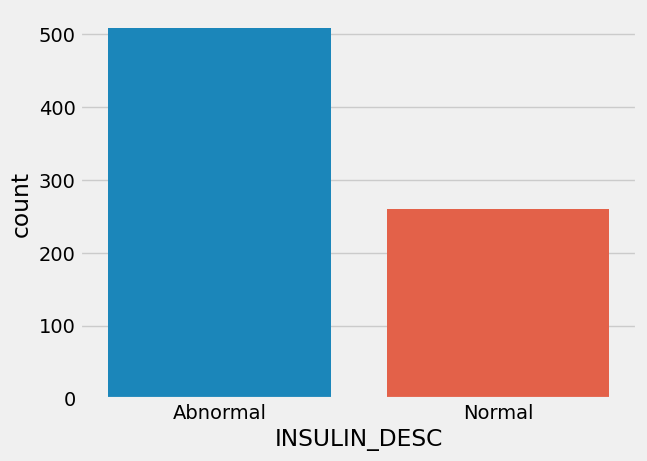

In [ ]:
sns.countplot(data=df, x = 'INSULIN_DESC', label='Count')

AB, NB = df['INSULIN_DESC'].value_counts()
print('Number of patients Having Abnormal Insulin Levels: ',AB)
print('Number of patients Having Normal Insulin Levels: ',NB)

Number of patients Having Underweight BMI Index:  472
Number of patients Having Healthy BMI Index:  179
Number of patients Having Overweigth BMI Index:  102
Number of patients Having Obese BMI Index:  15


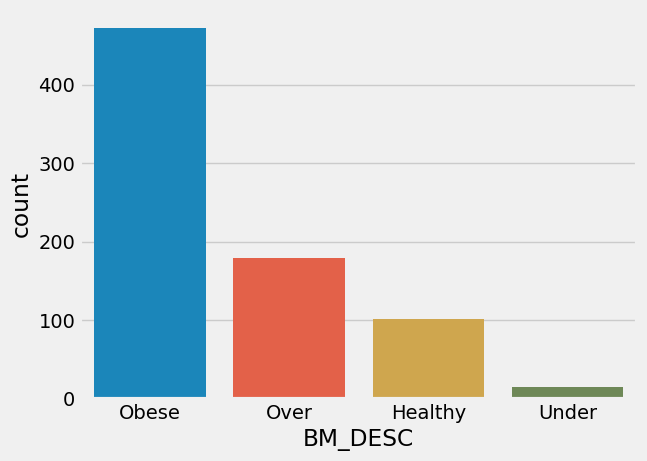

In [ ]:
sns.countplot(data=df, x = 'BM_DESC', label='Count')

UD,H,OV,OB = df['BM_DESC'].value_counts()
print('Number of patients Having Underweight BMI Index: ',UD)
print('Number of patients Having Healthy BMI Index: ',H)
print('Number of patients Having Overweigth BMI Index: ',OV)
print('Number of patients Having Obese BMI Index: ',OB)

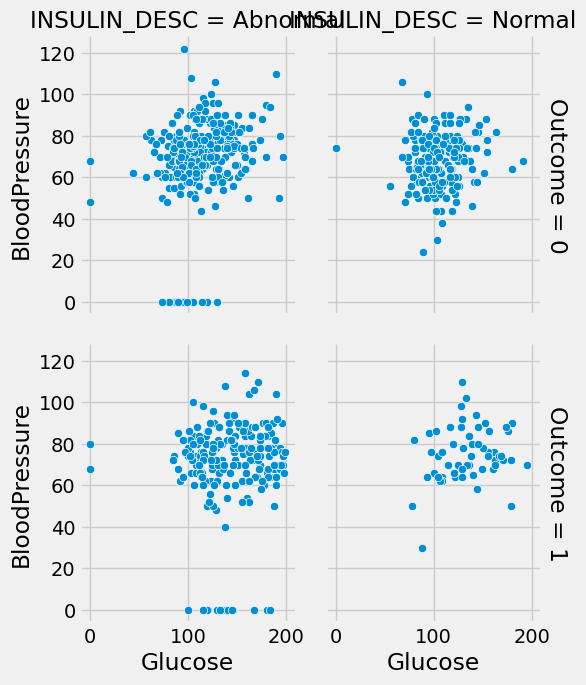

In [ ]:


g = sns.FacetGrid(df, col="INSULIN_DESC", row="Outcome", margin_titles=True)
g.map(plt.scatter,"Glucose", "BloodPressure",  edgecolor="w")
plt.subplots_adjust(top=1.1)



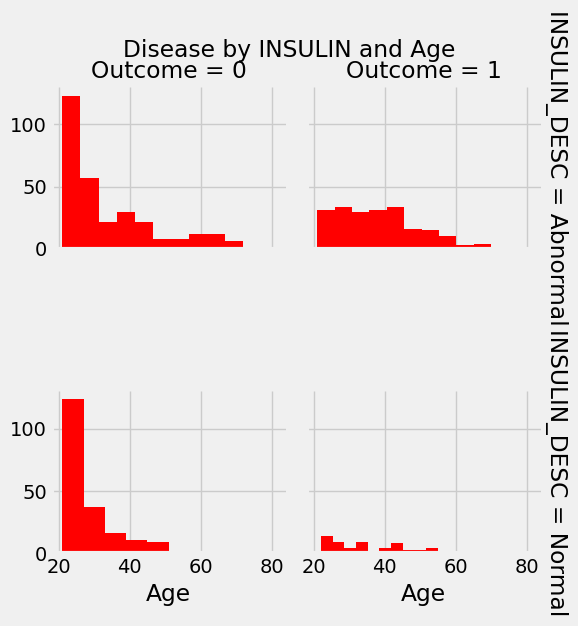

In [ ]:


g = sns.FacetGrid(df, col="Outcome", row="INSULIN_DESC", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by INSULIN and Age');



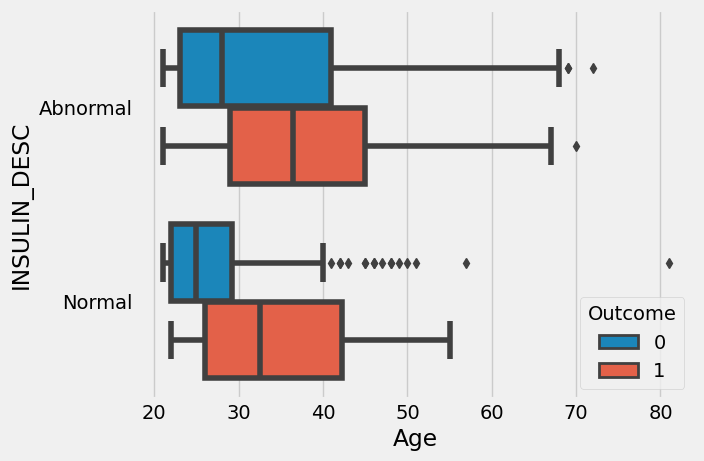

In [ ]:
sns.boxplot(x="Age", y="INSULIN_DESC", hue="Outcome", data=df);



It seems from the above plot that patients having normal insulin levels are more diabetic within the age range from 25 and 42 where as patients having anormal insulin levels are more diabetic in the age range of late 20's to mid 40's.


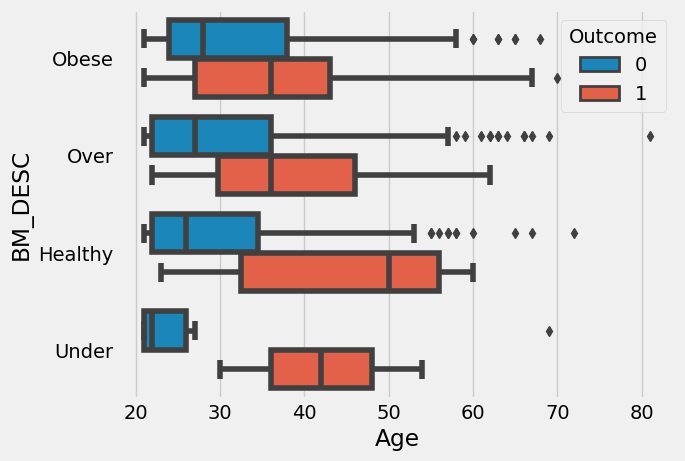

In [ ]:
sns.boxplot(x="Age", y="BM_DESC", hue="Outcome", data=df);



From the above plot it is evident that patients who are obese as per BMI index are more diabetic in early age of 25 where as patients who are overweight are prone to diabetes in early 30's

As far as data is concerned it is the data of all women patients at least 21 years old of Pima Indian heritage.So, the findings may differ in other cases.



 **Label Encoding**

In this step we will encode the categorical variables BM_DESC,INSULIN_DESC into numerical values before fitting it into machine learning models.


In [ ]:
df["INSULIN_DESC"] = df.INSULIN_DESC.apply(lambda  x:1 if x=="Normal" else 0)



Segregating Features and Target Variable.

I have taken X as Feature variable and y as target variable.


In [ ]:
X=pd.get_dummies(df,drop_first=True)
X=X.drop(['Outcome'],axis=1)
y = df['Outcome']

In [ ]:

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,INSULIN_DESC,BM_DESC_Obese,BM_DESC_Over,BM_DESC_Under
0,6,148,72,35,0,33.6,0.627,50,0,1,0,0
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0
2,8,183,64,0,0,23.3,0.672,32,0,0,0,0
3,1,89,66,23,94,28.1,0.167,21,1,0,1,0
4,0,137,40,35,168,43.1,2.288,33,0,1,0,0


In [ ]:


y.head()



0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Splitting data into Training & Testing Set**

The training dataset and test dataset must be similar, usually have the same predictors or variables. They differ on the observations and specific values in the variables. If you fit the model on the training dataset, then you implicitly minimize error or find correct responses. The fitted model provides a good prediction on the training dataset. Then you test the model on the test dataset. If the model predicts good also on the test dataset, you have more confidence. You have more confidence since the test dataset is similar to the training dataset, but not the same nor seen by the model. It means the model transfers prediction or learning in real sense.

So,by splitting dataset into training and testing subset, we can efficiently measure our trained model since it never sees testing data before.Thus it's possible to prevent overfitting.

I am just splitting dataset into 20% of test data and remaining 80% will used for training the model.

I have used stratify parameter.This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)



**Feature Scaling**
  
  Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.

If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [ ]:
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))

In [ ]:


svc_model_r = SVC(kernel='rbf',probability=True)
svc_model_r.fit(X_train_scaled, y_train)



SVC(probability=True)

In [ ]:


xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train, verbose=True)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=47)

In [ ]:
from sklearn.model_selection import KFold
num_splits = 5
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)
scoring = 'accuracy'

In [ ]:
acc_xgb = cross_val_score(estimator = xgb_classifier, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_xgb.mean()

0.5814207650273223

In [ ]:




xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train, verbose=True)



random_forest = RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47)
random_forest.fit(X_train_scaled, y_train)



svc_model_l = SVC(kernel='linear',probability=True)
svc_model_l.fit(X_train_scaled, y_train)



svc_model_r = SVC(kernel='rbf',probability=True)
svc_model_r.fit(X_train_scaled, y_train)





SVC(probability=True)

In [ ]:
import numpy as np
import pandas as pd

# Checking data types
print(type(X_train_scaled))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

X_train_scaled shape: (614, 12)
y_train shape: (614,)


In [ ]:
kfold = model_selection.KFold(n_splits=12)
scoring = 'accuracy'


acc_xgb = cross_val_score(estimator = xgb_classifier, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_xgb.mean()


acc_rand = cross_val_score(estimator = random_forest, X = X_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_rand.mean()

acc_svc_l = cross_val_score(estimator = svc_model_l, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_svc_l.mean()

acc_svc_r = cross_val_score(estimator = svc_model_r, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_svc_r.mean()

0.6496983408748115

In [ ]:
import pandas as pd

# Creating an empty DataFrame
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

In [ ]:


y_predict_x = xgb_classifier.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_x)
acc = accuracy_score(y_test, y_predict_x)
prec = precision_score(y_test, y_predict_x)
rec = recall_score(y_test, y_predict_x)
f1 = f1_score(y_test, y_predict_x)

model_results = pd.DataFrame([['XG Boost',acc, acc_xgb.mean(),prec,rec, f1,roc]],
               columns = ['Model','Accuracy', 'Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results



<ipython-input-113-d7b9b1940c05>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,XG Boost,0.623377,0.58789,0.457143,0.290909,0.355556,0.549495
